**CORRECT TESTING CONFIGURATION (NO QUANTIZATION)**

quantized version is in RewardTesting.ipynb. 

no quantization --> seems to be no improvement. quantised 4 bit --> can see slight improvement in score. This may be bc --load_in_4bit was used when training adaptor so might be already quantised model. 

In [2]:
from peft import PeftConfig, PeftModel
from transformers import AutoModelForCausalLM, AutoTokenizer
import time

base_model_name = "google/gemma-1.1-7b-it" 
adapter_model_name = "./kto-aligned-model-lora-2"

model = AutoModelForCausalLM.from_pretrained(base_model_name)
model = PeftModel.from_pretrained(model, adapter_model_name)

tokenizer = AutoTokenizer.from_pretrained(base_model_name)

input_text = """
BLUELAND is a make-believe country. REDLAND is another make-believe country, an enemy of BLUELAND. 

Write me a training scenario for an air strike mission by BLUELAND to destroy a specified target. This scenario will be given to BLUELAND, who will devise a strategy to execute the plan. The scenario should be non-descriptive, concise and factual. The information should be sufficient to help BLUELAND to decide their loadout and strategy. The scenario should include the following information about the target and REDLAND: 
1.	Commander’s Intent: Captures the broad mission objectives (eg: 100% TOT, 50% BLUELAND losses, 100% REDLAND destruction, destroy bunkers, etc)
2.	Force Composition: REDLAND’s units and objects participating in the scenario, Order of Battle, i.e the identification, strength, command structure, disposition for the personnel, units, equipment of any military force, command & control hierarchies, communication networks and communication channels. This should be specific, i.e exact model of aircraft or missiles (eg: F-15 fighter jets, SA-7 surface-to-air missile launchers, ZSU-23-4 Shilka self-propelled anti-aircraft gun systems, etc). 
3.	Geography: Distance to target and distance to REDLAND threats  in nautical miles (nm). Specification of environmental conditions which are of interest (eg: day/night/dawn, buildings, vegetation, ditches in surroundings, etc) 
4.	Surrounding Conditions: Overview of all scenario-related information of interest, i.e surrounding military situation, REDLAND readiness state, etc.
5.	Target(s) Details:  Any relevant information about target(s), i.e type and number of targets. 
6.	Rules of Engagement: Directives that outline when and how BLUELAND can engage hostile forces.
"""
dict = {}
dict["role"] = "user"
dict["content"] = input_text
chat = [dict,]
prompt = tokenizer.apply_chat_template(chat, tokenize=False, add_generation_prompt=True)

start_time = time.time()
        
inputs = tokenizer.encode(prompt, add_special_tokens=False, return_tensors="pt")
outputs = model.generate(do_sample=True, input_ids=inputs, max_length=500, max_new_tokens=1000) # set the max_length and max_tokens based on the configuration you used for training to get optimal results 
output_text = tokenizer.decode(outputs[0])

end_time = time.time()
# Calculate the execution time
execution_time = (end_time - start_time)/60
print("Execution time:", execution_time, "minutes\n")

print(output_text)

C:\Users\Development (UC)\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
Both `max_new_tokens` (=1000) and `max_length`(=500) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Execution time: 9.046872103214264 minutes

<bos><start_of_turn>user
BLUELAND is a make-believe country. REDLAND is another make-believe country, an enemy of BLUELAND. 

Write me a training scenario for an air strike mission by BLUELAND to destroy a specified target. This scenario will be given to BLUELAND, who will devise a strategy to execute the plan. The scenario should be non-descriptive, concise and factual. The information should be sufficient to help BLUELAND to decide their loadout and strategy. The scenario should include the following information about the target and REDLAND: 
1.	Commander’s Intent: Captures the broad mission objectives (eg: 100% TOT, 50% BLUELAND losses, 100% REDLAND destruction, destroy bunkers, etc)
2.	Force Composition: REDLAND’s units and objects participating in the scenario, Order of Battle, i.e the identification, strength, command structure, disposition for the personnel, units, equipment of any military force, command & control hierarchies, communic

In [3]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

reward_tokenizer = AutoTokenizer.from_pretrained("./rewardmodel1")
reward_model = AutoModelForSequenceClassification.from_pretrained("./rewardmodel1")

def get_score(model, tokenizer, response):
    # Tokenize the input sequences
    inputs = tokenizer.encode_plus(response, truncation=True, padding="max_length", max_length=512, return_tensors="pt")

    # Perform forward pass
    with torch.no_grad():
        outputs = model(**inputs)

    # Extract the logits
    logits = outputs.logits

    return logits.item()

print(get_score(reward_model, reward_tokenizer, output_text))

3.6922237873077393


**Incorporating New Model with Reward Model to Find Optimal N**

In [4]:
# Open the file in append mode ('a')
with open('llm_test.txt', 'a') as file:
    
    for i in range(13): 
        start_time = time.time()
        
        inputs = tokenizer.encode(prompt, add_special_tokens=False, return_tensors="pt")
        outputs = model.generate(do_sample=True, input_ids=inputs, max_length=500, max_new_tokens=8000)
        output_text = tokenizer.decode(outputs[0])
        
        end_time = time.time()
        # Calculate the execution time
        execution_time = (end_time - start_time)/60
        print("Execution time:", execution_time, "minutes\n")

        print(output_text)
        # Append additional text to the file
        file.write(output_text)
        file.write('\n\n\n\n\n')

Both `max_new_tokens` (=8000) and `max_length`(=500) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=8000) and `max_length`(=500) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Execution time: 7.917539870738983 minutes

<bos><start_of_turn>user
BLUELAND is a make-believe country. REDLAND is another make-believe country, an enemy of BLUELAND. 

Write me a training scenario for an air strike mission by BLUELAND to destroy a specified target. This scenario will be given to BLUELAND, who will devise a strategy to execute the plan. The scenario should be non-descriptive, concise and factual. The information should be sufficient to help BLUELAND to decide their loadout and strategy. The scenario should include the following information about the target and REDLAND: 
1.	Commander’s Intent: Captures the broad mission objectives (eg: 100% TOT, 50% BLUELAND losses, 100% REDLAND destruction, destroy bunkers, etc)
2.	Force Composition: REDLAND’s units and objects participating in the scenario, Order of Battle, i.e the identification, strength, command structure, disposition for the personnel, units, equipment of any military force, command & control hierarchies, communic

Both `max_new_tokens` (=8000) and `max_length`(=500) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Execution time: 8.311548793315888 minutes

<bos><start_of_turn>user
BLUELAND is a make-believe country. REDLAND is another make-believe country, an enemy of BLUELAND. 

Write me a training scenario for an air strike mission by BLUELAND to destroy a specified target. This scenario will be given to BLUELAND, who will devise a strategy to execute the plan. The scenario should be non-descriptive, concise and factual. The information should be sufficient to help BLUELAND to decide their loadout and strategy. The scenario should include the following information about the target and REDLAND: 
1.	Commander’s Intent: Captures the broad mission objectives (eg: 100% TOT, 50% BLUELAND losses, 100% REDLAND destruction, destroy bunkers, etc)
2.	Force Composition: REDLAND’s units and objects participating in the scenario, Order of Battle, i.e the identification, strength, command structure, disposition for the personnel, units, equipment of any military force, command & control hierarchies, communic

Both `max_new_tokens` (=8000) and `max_length`(=500) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Execution time: 8.30015649398168 minutes

<bos><start_of_turn>user
BLUELAND is a make-believe country. REDLAND is another make-believe country, an enemy of BLUELAND. 

Write me a training scenario for an air strike mission by BLUELAND to destroy a specified target. This scenario will be given to BLUELAND, who will devise a strategy to execute the plan. The scenario should be non-descriptive, concise and factual. The information should be sufficient to help BLUELAND to decide their loadout and strategy. The scenario should include the following information about the target and REDLAND: 
1.	Commander’s Intent: Captures the broad mission objectives (eg: 100% TOT, 50% BLUELAND losses, 100% REDLAND destruction, destroy bunkers, etc)
2.	Force Composition: REDLAND’s units and objects participating in the scenario, Order of Battle, i.e the identification, strength, command structure, disposition for the personnel, units, equipment of any military force, command & control hierarchies, communica

Both `max_new_tokens` (=8000) and `max_length`(=500) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Execution time: 9.083438690503439 minutes

<bos><start_of_turn>user
BLUELAND is a make-believe country. REDLAND is another make-believe country, an enemy of BLUELAND. 

Write me a training scenario for an air strike mission by BLUELAND to destroy a specified target. This scenario will be given to BLUELAND, who will devise a strategy to execute the plan. The scenario should be non-descriptive, concise and factual. The information should be sufficient to help BLUELAND to decide their loadout and strategy. The scenario should include the following information about the target and REDLAND: 
1.	Commander’s Intent: Captures the broad mission objectives (eg: 100% TOT, 50% BLUELAND losses, 100% REDLAND destruction, destroy bunkers, etc)
2.	Force Composition: REDLAND’s units and objects participating in the scenario, Order of Battle, i.e the identification, strength, command structure, disposition for the personnel, units, equipment of any military force, command & control hierarchies, communic

Both `max_new_tokens` (=8000) and `max_length`(=500) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Execution time: 8.20714900890986 minutes

<bos><start_of_turn>user
BLUELAND is a make-believe country. REDLAND is another make-believe country, an enemy of BLUELAND. 

Write me a training scenario for an air strike mission by BLUELAND to destroy a specified target. This scenario will be given to BLUELAND, who will devise a strategy to execute the plan. The scenario should be non-descriptive, concise and factual. The information should be sufficient to help BLUELAND to decide their loadout and strategy. The scenario should include the following information about the target and REDLAND: 
1.	Commander’s Intent: Captures the broad mission objectives (eg: 100% TOT, 50% BLUELAND losses, 100% REDLAND destruction, destroy bunkers, etc)
2.	Force Composition: REDLAND’s units and objects participating in the scenario, Order of Battle, i.e the identification, strength, command structure, disposition for the personnel, units, equipment of any military force, command & control hierarchies, communica

Both `max_new_tokens` (=8000) and `max_length`(=500) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Execution time: 8.344382878144582 minutes

<bos><start_of_turn>user
BLUELAND is a make-believe country. REDLAND is another make-believe country, an enemy of BLUELAND. 

Write me a training scenario for an air strike mission by BLUELAND to destroy a specified target. This scenario will be given to BLUELAND, who will devise a strategy to execute the plan. The scenario should be non-descriptive, concise and factual. The information should be sufficient to help BLUELAND to decide their loadout and strategy. The scenario should include the following information about the target and REDLAND: 
1.	Commander’s Intent: Captures the broad mission objectives (eg: 100% TOT, 50% BLUELAND losses, 100% REDLAND destruction, destroy bunkers, etc)
2.	Force Composition: REDLAND’s units and objects participating in the scenario, Order of Battle, i.e the identification, strength, command structure, disposition for the personnel, units, equipment of any military force, command & control hierarchies, communic

Both `max_new_tokens` (=8000) and `max_length`(=500) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Execution time: 7.654908978939057 minutes

<bos><start_of_turn>user
BLUELAND is a make-believe country. REDLAND is another make-believe country, an enemy of BLUELAND. 

Write me a training scenario for an air strike mission by BLUELAND to destroy a specified target. This scenario will be given to BLUELAND, who will devise a strategy to execute the plan. The scenario should be non-descriptive, concise and factual. The information should be sufficient to help BLUELAND to decide their loadout and strategy. The scenario should include the following information about the target and REDLAND: 
1.	Commander’s Intent: Captures the broad mission objectives (eg: 100% TOT, 50% BLUELAND losses, 100% REDLAND destruction, destroy bunkers, etc)
2.	Force Composition: REDLAND’s units and objects participating in the scenario, Order of Battle, i.e the identification, strength, command structure, disposition for the personnel, units, equipment of any military force, command & control hierarchies, communic

Both `max_new_tokens` (=8000) and `max_length`(=500) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Execution time: 7.251883327960968 minutes

<bos><start_of_turn>user
BLUELAND is a make-believe country. REDLAND is another make-believe country, an enemy of BLUELAND. 

Write me a training scenario for an air strike mission by BLUELAND to destroy a specified target. This scenario will be given to BLUELAND, who will devise a strategy to execute the plan. The scenario should be non-descriptive, concise and factual. The information should be sufficient to help BLUELAND to decide their loadout and strategy. The scenario should include the following information about the target and REDLAND: 
1.	Commander’s Intent: Captures the broad mission objectives (eg: 100% TOT, 50% BLUELAND losses, 100% REDLAND destruction, destroy bunkers, etc)
2.	Force Composition: REDLAND’s units and objects participating in the scenario, Order of Battle, i.e the identification, strength, command structure, disposition for the personnel, units, equipment of any military force, command & control hierarchies, communic

Both `max_new_tokens` (=8000) and `max_length`(=500) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Execution time: 7.800805739561716 minutes

<bos><start_of_turn>user
BLUELAND is a make-believe country. REDLAND is another make-believe country, an enemy of BLUELAND. 

Write me a training scenario for an air strike mission by BLUELAND to destroy a specified target. This scenario will be given to BLUELAND, who will devise a strategy to execute the plan. The scenario should be non-descriptive, concise and factual. The information should be sufficient to help BLUELAND to decide their loadout and strategy. The scenario should include the following information about the target and REDLAND: 
1.	Commander’s Intent: Captures the broad mission objectives (eg: 100% TOT, 50% BLUELAND losses, 100% REDLAND destruction, destroy bunkers, etc)
2.	Force Composition: REDLAND’s units and objects participating in the scenario, Order of Battle, i.e the identification, strength, command structure, disposition for the personnel, units, equipment of any military force, command & control hierarchies, communic

Both `max_new_tokens` (=8000) and `max_length`(=500) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Execution time: 8.124235641956329 minutes

<bos><start_of_turn>user
BLUELAND is a make-believe country. REDLAND is another make-believe country, an enemy of BLUELAND. 

Write me a training scenario for an air strike mission by BLUELAND to destroy a specified target. This scenario will be given to BLUELAND, who will devise a strategy to execute the plan. The scenario should be non-descriptive, concise and factual. The information should be sufficient to help BLUELAND to decide their loadout and strategy. The scenario should include the following information about the target and REDLAND: 
1.	Commander’s Intent: Captures the broad mission objectives (eg: 100% TOT, 50% BLUELAND losses, 100% REDLAND destruction, destroy bunkers, etc)
2.	Force Composition: REDLAND’s units and objects participating in the scenario, Order of Battle, i.e the identification, strength, command structure, disposition for the personnel, units, equipment of any military force, command & control hierarchies, communic

Both `max_new_tokens` (=8000) and `max_length`(=500) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Execution time: 6.921224749088287 minutes

<bos><start_of_turn>user
BLUELAND is a make-believe country. REDLAND is another make-believe country, an enemy of BLUELAND. 

Write me a training scenario for an air strike mission by BLUELAND to destroy a specified target. This scenario will be given to BLUELAND, who will devise a strategy to execute the plan. The scenario should be non-descriptive, concise and factual. The information should be sufficient to help BLUELAND to decide their loadout and strategy. The scenario should include the following information about the target and REDLAND: 
1.	Commander’s Intent: Captures the broad mission objectives (eg: 100% TOT, 50% BLUELAND losses, 100% REDLAND destruction, destroy bunkers, etc)
2.	Force Composition: REDLAND’s units and objects participating in the scenario, Order of Battle, i.e the identification, strength, command structure, disposition for the personnel, units, equipment of any military force, command & control hierarchies, communic

Both `max_new_tokens` (=8000) and `max_length`(=500) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Execution time: 8.07762310107549 minutes

<bos><start_of_turn>user
BLUELAND is a make-believe country. REDLAND is another make-believe country, an enemy of BLUELAND. 

Write me a training scenario for an air strike mission by BLUELAND to destroy a specified target. This scenario will be given to BLUELAND, who will devise a strategy to execute the plan. The scenario should be non-descriptive, concise and factual. The information should be sufficient to help BLUELAND to decide their loadout and strategy. The scenario should include the following information about the target and REDLAND: 
1.	Commander’s Intent: Captures the broad mission objectives (eg: 100% TOT, 50% BLUELAND losses, 100% REDLAND destruction, destroy bunkers, etc)
2.	Force Composition: REDLAND’s units and objects participating in the scenario, Order of Battle, i.e the identification, strength, command structure, disposition for the personnel, units, equipment of any military force, command & control hierarchies, communica

In [3]:
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
import time

quantization_config = BitsAndBytesConfig(load_in_4bit=True)

tokenizer = AutoTokenizer.from_pretrained("google/gemma-1.1-7b-it")
model = AutoModelForCausalLM.from_pretrained(
    "google/gemma-1.1-7b-it",
    quantization_config=quantization_config
)

input_text = """
BLUELAND is a make-believe country. REDLAND is another make-believe country, an enemy of BLUELAND. 

Write me a training scenario for an air strike mission by BLUELAND to destroy a specified target. This scenario will be given to BLUELAND, who will devise a strategy to execute the plan. The scenario should be non-descriptive, concise and factual. The information should be sufficient to help BLUELAND to decide their loadout and strategy. The scenario should include the following information about the target and REDLAND: 
1.	Commander’s Intent: Captures the broad mission objectives (eg: 100% TOT, 50% BLUELAND losses, 100% REDLAND destruction, destroy bunkers, etc)
2.	Force Composition: REDLAND’s units and objects participating in the scenario, Order of Battle, i.e the identification, strength, command structure, disposition for the personnel, units, equipment of any military force, command & control hierarchies, communication networks and communication channels. This should be specific, i.e exact model of aircraft or missiles (eg: F-15 fighter jets, SA-7 surface-to-air missile launchers, ZSU-23-4 Shilka self-propelled anti-aircraft gun systems, etc). 
3.	Geography: Distance to target and distance to REDLAND threats  in nautical miles (nm). Specification of environmental conditions which are of interest (eg: day/night/dawn, buildings, vegetation, ditches in surroundings, etc) 
4.	Surrounding Conditions: Overview of all scenario-related information of interest, i.e surrounding military situation, REDLAND readiness state, etc.
5.	Target(s) Details:  Any relevant information about target(s), i.e type and number of targets. 
6.	Rules of Engagement: Directives that outline when and how BLUELAND can engage hostile forces.
"""
dict = {}
dict["role"] = "user"
dict["content"] = input_text
chat = [dict,]
prompt = tokenizer.apply_chat_template(chat, tokenize=False, add_generation_prompt=True)

for i in range(5): 
    start_time = time.time()
    
    inputs = tokenizer.encode(prompt, add_special_tokens=False, return_tensors="pt")
    outputs = model.generate(do_sample=True, input_ids=inputs, max_length=500, max_new_tokens=8000)
    output_text = tokenizer.decode(outputs[0])
    
    end_time = time.time()
    # Calculate the execution time
    execution_time = (end_time - start_time)/60
    print("Execution time:", execution_time, "minutes\n")

    print(output_text)

`low_cpu_mem_usage` was None, now set to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Both `max_new_tokens` (=8000) and `max_length`(=500) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
D:\miniconda3\envs\llm2\lib\site-packages\transformers\generation\utils.py:1659: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(
D:\miniconda3\envs\llm2\lib\site-packages\bitsandbytes\nn\modules.py:426: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(
D:\mini

Execution time: 4.7460654695828755 minutes

<bos><start_of_turn>user
BLUELAND is a make-believe country. REDLAND is another make-believe country, an enemy of BLUELAND. 

Write me a training scenario for an air strike mission by BLUELAND to destroy a specified target. This scenario will be given to BLUELAND, who will devise a strategy to execute the plan. The scenario should be non-descriptive, concise and factual. The information should be sufficient to help BLUELAND to decide their loadout and strategy. The scenario should include the following information about the target and REDLAND: 
1.	Commander’s Intent: Captures the broad mission objectives (eg: 100% TOT, 50% BLUELAND losses, 100% REDLAND destruction, destroy bunkers, etc)
2.	Force Composition: REDLAND’s units and objects participating in the scenario, Order of Battle, i.e the identification, strength, command structure, disposition for the personnel, units, equipment of any military force, command & control hierarchies, communi

D:\miniconda3\envs\llm2\lib\site-packages\transformers\generation\utils.py:1659: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(
Both `max_new_tokens` (=8000) and `max_length`(=500) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Execution time: 3.99663382768631 minutes

<bos><start_of_turn>user
BLUELAND is a make-believe country. REDLAND is another make-believe country, an enemy of BLUELAND. 

Write me a training scenario for an air strike mission by BLUELAND to destroy a specified target. This scenario will be given to BLUELAND, who will devise a strategy to execute the plan. The scenario should be non-descriptive, concise and factual. The information should be sufficient to help BLUELAND to decide their loadout and strategy. The scenario should include the following information about the target and REDLAND: 
1.	Commander’s Intent: Captures the broad mission objectives (eg: 100% TOT, 50% BLUELAND losses, 100% REDLAND destruction, destroy bunkers, etc)
2.	Force Composition: REDLAND’s units and objects participating in the scenario, Order of Battle, i.e the identification, strength, command structure, disposition for the personnel, units, equipment of any military force, command & control hierarchies, communica

Both `max_new_tokens` (=8000) and `max_length`(=500) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Execution time: 4.1919661402702335 minutes

<bos><start_of_turn>user
BLUELAND is a make-believe country. REDLAND is another make-believe country, an enemy of BLUELAND. 

Write me a training scenario for an air strike mission by BLUELAND to destroy a specified target. This scenario will be given to BLUELAND, who will devise a strategy to execute the plan. The scenario should be non-descriptive, concise and factual. The information should be sufficient to help BLUELAND to decide their loadout and strategy. The scenario should include the following information about the target and REDLAND: 
1.	Commander’s Intent: Captures the broad mission objectives (eg: 100% TOT, 50% BLUELAND losses, 100% REDLAND destruction, destroy bunkers, etc)
2.	Force Composition: REDLAND’s units and objects participating in the scenario, Order of Battle, i.e the identification, strength, command structure, disposition for the personnel, units, equipment of any military force, command & control hierarchies, communi

Both `max_new_tokens` (=8000) and `max_length`(=500) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Execution time: 4.215883334477742 minutes

<bos><start_of_turn>user
BLUELAND is a make-believe country. REDLAND is another make-believe country, an enemy of BLUELAND. 

Write me a training scenario for an air strike mission by BLUELAND to destroy a specified target. This scenario will be given to BLUELAND, who will devise a strategy to execute the plan. The scenario should be non-descriptive, concise and factual. The information should be sufficient to help BLUELAND to decide their loadout and strategy. The scenario should include the following information about the target and REDLAND: 
1.	Commander’s Intent: Captures the broad mission objectives (eg: 100% TOT, 50% BLUELAND losses, 100% REDLAND destruction, destroy bunkers, etc)
2.	Force Composition: REDLAND’s units and objects participating in the scenario, Order of Battle, i.e the identification, strength, command structure, disposition for the personnel, units, equipment of any military force, command & control hierarchies, communic

In [14]:
import pandas as pd

df = pd.read_csv('llmData2_test.csv')
print(df.head())

                                            response
0  <bos><start_of_turn>user\nBLUELAND is a make-b...
1  <bos><start_of_turn>user\nBLUELAND is a make-b...
2  <bos><start_of_turn>user\nBLUELAND is a make-b...
3  <bos><start_of_turn>user\nBLUELAND is a make-b...
4  <bos><start_of_turn>user\nBLUELAND is a make-b...


In [15]:
lst = df['response'].tolist()

In [24]:
import random 

lst_scores = [[], [], [], [], []]

for k in range(10): 
    for n in range(1, 6): 
        score3 = 0 
        for i in range(0, 3): 
            score = 0 
            for j in range(n): 
                indx = random.randint(0, 4) 
                score += get_score(reward_model, reward_tokenizer, lst[i*5 + indx])
            score3 += score 
        lst_scores[n-1] += [score3/(3*n)]

avg_scores = []
for i in range(5): 
    avg_scores.append(sum(lst_scores[i])/len(lst_scores[i]))

In [25]:
print(avg_scores)

[2.5120494504769644, 2.4558669080336886, 2.522990817825, 2.300938868770997, 2.6005610724290213]


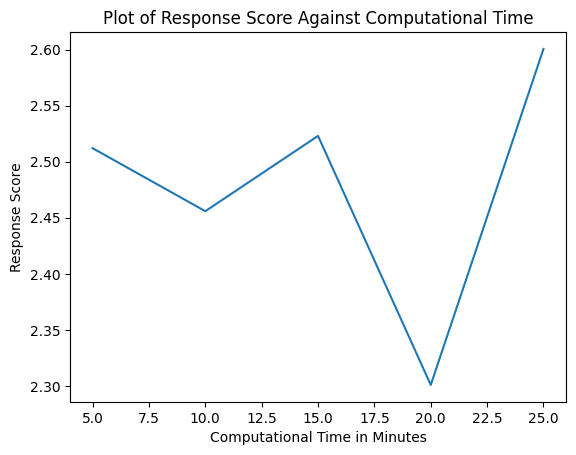

In [34]:
time = [5, 10, 15, 20, 25]

import matplotlib.pyplot as plt

# Create a figure and an axis
fig, ax = plt.subplots()

# Plot the data
ax.plot(time, avg_scores)

# Add a title and labels
ax.set_title('Plot of Response Score Against Computational Time')
ax.set_xlabel('Computational Time in Minutes')
ax.set_ylabel('Response Score')

# Show the plot
plt.show()

In [31]:
score = 0 
for i in range(15, 20): 
    score += get_score(reward_model, reward_tokenizer, lst[i])
print(score/5)

score = 0 
for i in range(0, 15): 
    score += get_score(reward_model, reward_tokenizer, lst[i])
print(score/15)

1.023453387618065
2.5397723535696666
